In [203]:
import pandas as pd
import warnings
import pandas as pd
from collections import defaultdict
from pyvis.network import Network
from itertools import combinations
import numpy as np

pd.set_option('display.max_colwidth',100)

data=pd.read_csv('dataset/Assignment-1_Data.csv',sep=';',usecols=['Itemname','CustomerID','BillNo'],nrows=1000).dropna(subset='Itemname')
data_concatinated=data.groupby(['CustomerID','BillNo'])['Itemname'].agg(','.join).reset_index()
data_concatinated['Itemname1'] = data_concatinated['Itemname'].str.split(',')

# Keep only the rows where the length of the split items is greater than 1
data_concatinated = data_concatinated[data_concatinated['Itemname1'].apply(lambda x: len(x) > 1)]
data_concatinated.drop(columns=['Itemname1'], inplace=True)
data_concatinated

,CustomerID,BillNo,Itemname
0,12431.0,536389,"CHRISTMAS LIGHTS 10 REINDEER,VINTAGE UNION JACK CUSHION COVER,VINTAGE HEADS AND TAILS CARD GAME,..."
1,12583.0,536370,"ALARM CLOCK BAKELIKE PINK,ALARM CLOCK BAKELIKE RED,ALARM CLOCK BAKELIKE GREEN,PANDA AND BUNNIES ..."
2,12791.0,536403,"HAND WARMER BIRD DESIGN,POSTAGE"
3,12838.0,536415,"60 CAKE CASES VINTAGE CHRISTMAS,PAPER CHAIN KIT VINTAGE CHRISTMAS,RIBBON REEL CHRISTMAS SOCK BAU..."
4,13047.0,536367,"ASSORTED COLOUR BIRD ORNAMENT,POPPY'S PLAYHOUSE BEDROOM,POPPY'S PLAYHOUSE KITCHEN,FELTCRAFT PRIN..."
5,13047.0,536368,"JAM MAKING SET WITH JARS,RED COAT RACK PARIS FASHION,YELLOW COAT RACK PARIS FASHION,BLUE COAT RA..."
7,13255.0,536416,"ROTATING LEAVES T-LIGHT HOLDER,RED HARMONICA IN BOX,CUPCAKE LACE PAPER SET 6,FAMILY PHOTO FRAME..."
8,13408.0,536394,"FANCY FONT BIRTHDAY CARD,,HAND WARMER UNION JACK,HAND WARMER SCOTTY DOG DESIGN,HAND WARMER OWL D..."
9,13448.0,536398,"PACK OF 12 RED RETROSPOT TISSUES,RED RETROSPOT MUG,BABUSHKA LIGHTS STRING OF 10,PIGGY BANK RETRO..."
11,13694.0,536437,"RED RETROSPOT OVEN GLOVE,CREAM HEART CARD HOLDER,NAMASTE SWAGAT INCENSE,CERAMIC STRAWBERRY DESIG..."


In [204]:
# Function to generate pairs of source and target items from a string of items
def generate_pairs(item_str):
    items = item_str.split(',')
    return list(combinations(items, 2))

# Apply the function to generate pairs for each row
relationship_df  = data_concatinated.assign(source_target=data_concatinated['Itemname'].apply(generate_pairs)) \
         .explode('source_target') \
         .rename(columns={'source_target': 'source_target_pair'})

# # Split the pairs into source and target columns
relationship_df [['source', 'target']] = pd.DataFrame(relationship_df ['source_target_pair'].tolist(), index=relationship_df.index)

# Drop the intermediate column
relationship_df .drop(columns=['Itemname', 'source_target_pair'], inplace=True)
relationship_df =relationship_df .sort_values(by='source').dropna(subset='source')
relationship_df =relationship_df[relationship_df['source'] != ""]
relationship_df

,CustomerID,BillNo,source,target
20,14729.0,536520,BREAKFAST IN BED,TOAST ITS - HAPPY BIRTHDAY
20,14729.0,536520,BREAKFAST IN BED,PACK OF 6 HANDBAG GIFT BOXES
20,14729.0,536520,BREAKFAST IN BED,PINK PAISLEY SQUARE TISSUE BOX
20,14729.0,536520,BREAKFAST IN BED,SKULLS SQUARE TISSUE BOX
20,14729.0,536520,BREAKFAST IN BED,PIZZA PLATE IN BOX
...,...,...,...,...
26,15311.0,536381,ZINC WILLIE WINKIE CANDLE STICK,EDWARDIAN PARASOL NATURAL
26,15311.0,536381,ZINC WILLIE WINKIE CANDLE STICK,EDWARDIAN PARASOL BLACK
26,15311.0,536381,ZINC WILLIE WINKIE CANDLE STICK,SET OF 6 FUNKY BEAKERS
26,15311.0,536381,ZINC WILLIE WINKIE CANDLE STICK,CERAMIC CHERRY CAKE MONEY BANK


In [205]:
relationship_df=relationship_df[["source","target"]].reset_index(drop=True)

relationship_df=pd.DataFrame(np.sort(relationship_df.values, axis = 1), columns = relationship_df.columns)


In [206]:
relationship_df["value"] = 1
# relationship_df=relationship_df[["source","target","value"]].reset_index(drop=True)

# Display the sorted DataFrame
relationship_df=relationship_df.groupby(["source","target"], sort=False, as_index=False).sum().sort_values(by='value', ascending=False)
relationship_df

,source,target,value
96,12 DAISY PEGS IN WOOD BOX,SCANDINAVIAN REDS RIBBONS,15
119,12 DAISY PEGS IN WOOD BOX,6 RIBBONS RUSTIC CHARM,15
104,12 DAISY PEGS IN WOOD BOX,5 HOOK HANGER RED MAGIC TOADSTOOL,15
86,12 DAISY PEGS IN WOOD BOX,COSY SLIPPER SHOES SMALL RED,15
87,12 DAISY PEGS IN WOOD BOX,FELTCRAFT DOLL MOLLY,15
...,...,...,...
5907,HANGING MEDINA LANTERN SMALL,HANGING METAL HEART LANTERN,1
5908,HANGING METAL HEART LANTERN,NATURAL SLATE HEART CHALKBOARD,1
5910,HANGING METAL HEART LANTERN,HEART OF WICKER LARGE,1
5911,HANGING METAL HEART LANTERN,WHITE LOVEBIRD LANTERN,1


In [207]:
relationship_df=relationship_df[relationship_df['source']!=relationship_df['target']]

In [208]:
import networkx as nx
# Create a graph from a pandas dataframe
G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

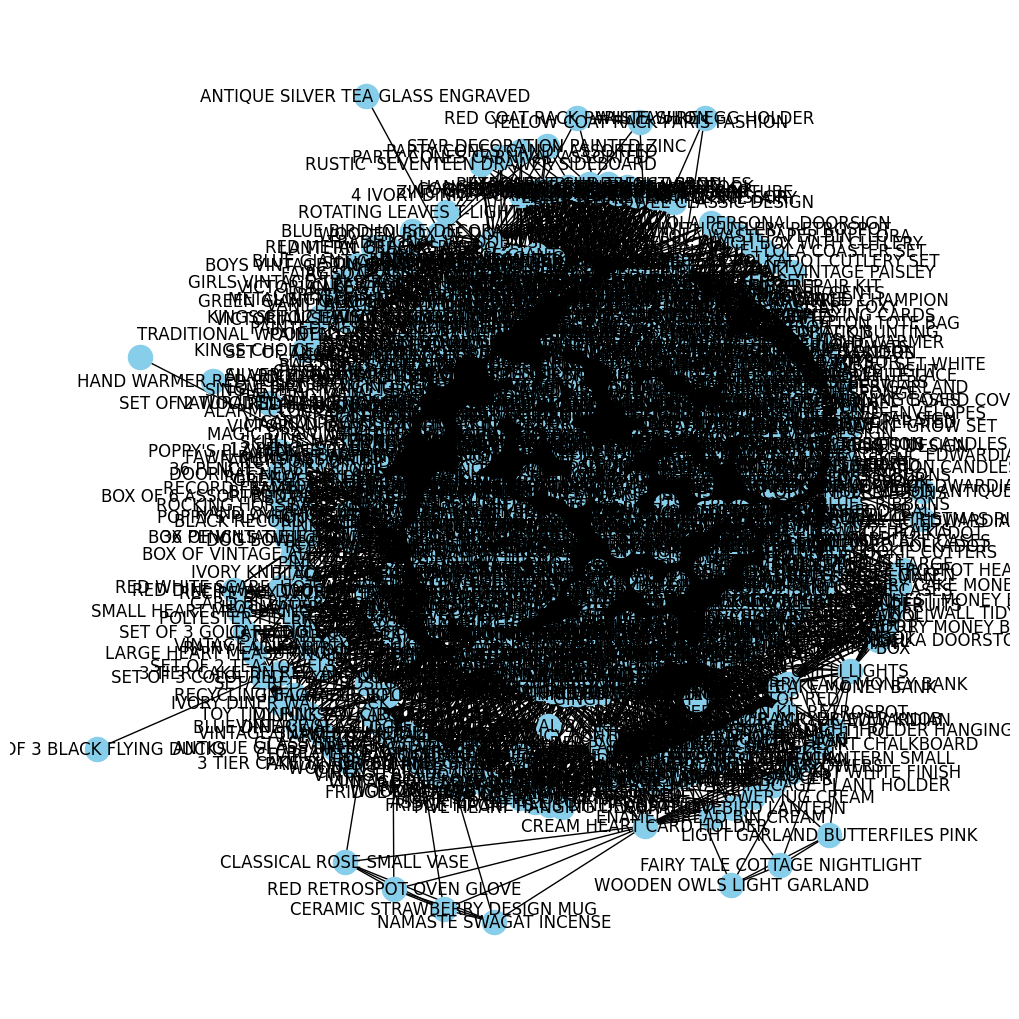

In [209]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [210]:
from pyvis.network import Network
net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')

node_degree = dict(G.degree)

#Setting up node size attribute
nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G)
net.show("witcher.html")

witcher.html
